# Relación BI-RADS 3, 4 y 5 con Síntomas

In [1]:
import pycaret
import pandas as pd
import ast 
from pycaret.classification import *
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
mlb = MultiLabelBinarizer()

In [2]:
normal_findings = ['Nipple Retraction',
 'Skin Retraction',
 'Skin Thickening']

anormal_findings = ['Architectural Distortion',
 'Asymmetry',
 'Focal Asymmetry',
 'Global Asymmetry',
 'Mass',
 'Suspicious Calcification']

suspicious_findings = ['Suspicious Lymph Node']

focus_findings = anormal_findings + suspicious_findings

abnormal_findings = suspicious_findings + normal_findings

focus_birads = ['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5']

all_findings = suspicious_findings + normal_findings +

In [3]:
few_findings = abnormal_findings + ['Architectural Distortion',
 'Asymmetry',
 'Focal Asymmetry',
 'Global Asymmetry']

target_findigs = ['Mass', 'Suspicious Calcification']



In [5]:
def procesar_dataset(df, findings):
    df['finding_categories'] = df['finding_categories'].apply(lambda x: ast.literal_eval(x))
    df_filtrado = df[df['finding_birads'].isin(focus_birads)]
    df_filtrado['finding_categories'] = df_filtrado['finding_categories'].apply(lambda x: [item for item in x if item not in findings]) 
    return(df_filtrado)  

def separacion_categoria(df, columna):
    finding_categories_encoded = pd.DataFrame(mlb.fit_transform(df[columna]),
                                            columns=mlb.classes_,
                                            index=df.index)

    df_transformed = pd.concat([df, finding_categories_encoded], axis=1).drop(columns = [columna])
    return df_transformed

def splitting(df):
    df_train = df[df['split'] == 'training'].drop(columns=['split'])
    df_test = df[df['split'] == 'test'].drop(columns=['split'])
    return df_train, df_test

def column_seleccionada(df):
    columna_inicio = df.columns.get_loc('Architectural Distortion')
    df_seleccionado = df.iloc[:, columna_inicio:]
    return df_seleccionado

def column_seleccionada_columna(df, columna):
    columna_inicio = df.columns.get_loc(columna)
    df_seleccionado = df.iloc[:, columna_inicio:]
    return df_seleccionado


def actualizar_categorias(row, categoria):
    # Revisar si la categoría está presente en 'finding_categories'
    if categoria in row['finding_categories']:
        if row['finding_birads'] == 'BI-RADS 3':
            row['finding_categories'] = [f'{categoria} - Benigna' if item == categoria else item for item in row['finding_categories']]
        elif row['finding_birads'] == 'BI-RADS 4':
            row['finding_categories'] = [f'{categoria} - Sospechosa' if item == categoria else item for item in row['finding_categories']]
        elif row['finding_birads'] == 'BI-RADS 5':
            row['finding_categories'] = [f'{categoria} - Maligna' if item == categoria else item for item in row['finding_categories']]
    
    return row['finding_categories']


## I. Relación DataSet completo, considerando solo los síntomas para BI-RADS 3, 4 y 5

In [6]:
archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo, delimiter= ';')
df = procesar_dataset(df)
df = separacion_categoria(df, 'finding_categories')
df_train, df_test = splitting(df)
x_train = column_seleccionada(df_train)
x_test = column_seleccionada(df_test)



In [7]:
clf1 = setup(data=x_train, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 7)"
5,Transformed data shape,"(1700, 7)"
6,Transformed train set shape,"(1190, 7)"
7,Transformed test set shape,"(510, 7)"
8,Numeric features,6
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5756,0.0000,0.5756,0.6288,0.5451,0.2752,0.3168,0.0220
lr,Logistic Regression,0.5748,0.0000,0.5748,0.6231,0.5433,0.2689,0.3070,1.0520
gbc,Gradient Boosting Classifier,0.5739,0.0000,0.5739,0.6210,0.5429,0.2704,0.3087,0.0650
lightgbm,Light Gradient Boosting Machine,0.5739,0.6769,0.5739,0.6210,0.5429,0.2704,0.3087,0.1220
dt,Decision Tree Classifier,0.5731,0.6759,0.5731,0.6199,0.5416,0.2686,0.3067,0.0090
ridge,Ridge Classifier,0.5723,0.0000,0.5723,0.6203,0.5406,0.2667,0.3047,0.0080
rf,Random Forest Classifier,0.5723,0.6749,0.5723,0.6192,0.5405,0.2672,0.3054,0.0610
et,Extra Trees Classifier,0.5723,0.6754,0.5723,0.6192,0.5405,0.2672,0.3054,0.0450
lda,Linear Discriminant Analysis,0.5706,0.0000,0.5706,0.6130,0.5395,0.2718,0.3113,0.0080
knn,K Neighbors Classifier,0.5597,0.6190,0.5597,0.5807,0.5435,0.2380,0.2512,0.2730


In [8]:
final_model = best_model
predictions = predict_model(final_model, data=x_test)
y_pred = predictions['prediction_label']
y_true = df_test['finding_birads']

accuracy = accuracy_score(y_true, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.5944


## II. Relación DataSet con Ajuste de síntomas o findings


Probar nuevas clasificaciones
Mass y Calcificación como:
1. Benigna
2. Sospechosa
3. Maligna

In [6]:
archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo, delimiter= ';')
df = procesar_dataset(df, abnormal_findings)

df['finding_categories'] = df.apply(actualizar_categorias, categoria='Mass', axis=1)

df['finding_categories'] = df.apply(actualizar_categorias, categoria='Suspicious Calcification', axis=1)


df = separacion_categoria(df, 'finding_categories')
df_train, df_test = splitting(df)
x_train = column_seleccionada(df_train)
x_test = column_seleccionada(df_test)


In [7]:
clf1 = setup(data=x_train, target=df_train['finding_birads'], session_id=123)

best_model = compare_models()


,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 11)"
5,Transformed data shape,"(1700, 11)"
6,Transformed train set shape,"(1190, 11)"
7,Transformed test set shape,"(510, 11)"
8,Numeric features,10
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9303,0.0000,0.9303,0.9370,0.9301,0.8825,0.8874,0.9210
rf,Random Forest Classifier,0.9303,0.9870,0.9303,0.9370,0.9301,0.8825,0.8874,0.0520
gbc,Gradient Boosting Classifier,0.9303,0.0000,0.9303,0.9370,0.9301,0.8825,0.8874,0.0690
et,Extra Trees Classifier,0.9303,0.9870,0.9303,0.9370,0.9301,0.8825,0.8874,0.0530
lightgbm,Light Gradient Boosting Machine,0.9303,0.9879,0.9303,0.9370,0.9301,0.8825,0.8874,0.1330
dt,Decision Tree Classifier,0.9294,0.9868,0.9294,0.9360,0.9292,0.8811,0.8858,0.0100
ridge,Ridge Classifier,0.9294,0.0000,0.9294,0.9363,0.9292,0.8811,0.8860,0.0100
lda,Linear Discriminant Analysis,0.9294,0.0000,0.9294,0.9363,0.9292,0.8811,0.8860,0.0110
svm,SVM - Linear Kernel,0.9261,0.0000,0.9261,0.9334,0.9258,0.8754,0.8808,0.0130
ada,Ada Boost Classifier,0.9193,0.0000,0.9193,0.9314,0.9186,0.8632,0.8722,0.0290


In [10]:
archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo, delimiter= ';')
df['finding_categories'] = df['finding_categories'].apply(lambda x: ast.literal_eval(x))
df  = df[df['finding_birads'].isin(focus_birads)]

df['finding_categories'] = df.apply(actualizar_categorias, categoria='Mass', axis=1)

df['finding_categories'] = df.apply(actualizar_categorias, categoria='Suspicious Calcification', axis=1)


df = separacion_categoria(df, 'finding_categories')
df_train, df_test = splitting(df)
x_train = column_seleccionada(df_train)
x_test = column_seleccionada(df_test)

In [11]:
x_train

,Architectural Distortion,Asymmetry,Focal Asymmetry,Global Asymmetry,Mass - Benigna,Mass - Maligna,Mass - Sospechosa,Nipple Retraction,Skin Retraction,Skin Thickening,Suspicious Calcification - Benigna,Suspicious Calcification - Maligna,Suspicious Calcification - Sospechosa
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,0,0,0,0,0,0,0,0,0,0,0,0,1
2242,0,0,0,0,0,0,1,0,0,0,0,0,0
2243,0,0,0,0,1,0,0,0,0,0,0,0,0
2252,0,0,1,0,0,0,0,0,0,0,0,0,1


In [14]:
best_model

Pipeline(memory=FastMemory(location=C:\Users\conyc\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Architectural Distortion',
                                             'Asymmetry', 'Focal Asymmetry',
                                             'Global Asymmetry',
                                             'Mass - Benigna', 'Mass - Malign...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [11]:
final_model = best_model
predictions = predict_model(final_model, data=x_test)
y_pred = predictions['prediction_label']
y_true = df_test['finding_birads']

accuracy = accuracy_score(y_true, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.9254


In [13]:
final_model = finalize_model(best_model)
save_model(final_model, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\conyc\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Architectural Distortion',
                                              'Asymmetry', 'Focal Asymmetry',
                                              'Global Asymmetry',
                                              'Mass - Benigna', 'Mass - Malign...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, inter

### Relación e Interpretación de los modelos

test


In [36]:
archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo, delimiter= ';')
df['finding_categories'] = df['finding_categories'].apply(lambda x: ast.literal_eval(x))
df = df[df['finding_birads'].isin(focus_birads)]

df = df[df['finding_categories'].apply(lambda x: set(x).issubset({'Mass', 'Suspicious Calcification'}))]


df['finding_categories'] = df.apply(actualizar_categorias, categoria='Mass', axis=1)

df['finding_categories'] = df.apply(actualizar_categorias, categoria='Suspicious Calcification', axis=1)


df = separacion_categoria(df, 'finding_categories')
df_train, df_test = splitting(df)
x_train = column_seleccionada_columna(df_train,'Mass - Benigna')
x_test = column_seleccionada_columna(df_test,'Mass - Benigna')
#df = df[df['finding_categories'].map(len) > 0]
x_train

,Mass - Benigna,Mass - Maligna,Mass - Sospechosa,Suspicious Calcification - Benigna,Suspicious Calcification - Maligna,Suspicious Calcification - Sospechosa
0,0,0,1,0,0,0
1,0,0,1,0,0,0
10,1,0,0,0,0,0
11,1,0,0,0,0,0
12,1,0,0,0,0,0
...,...,...,...,...,...,...
2239,0,1,0,0,0,0
2240,0,1,0,0,0,0
2241,0,0,0,0,0,1
2242,0,0,1,0,0,0


,Description,Value
0,Session id,123
1,Target,finding_birads
2,Target type,Multiclass
3,Target mapping,"BI-RADS 3: 0, BI-RADS 4: 1, BI-RADS 5: 2"
4,Original data shape,"(1700, 11)"
5,Transformed data shape,"(1700, 11)"
6,Transformed train set shape,"(1190, 11)"
7,Transformed test set shape,"(510, 11)"
8,Numeric features,10
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8992,0.9807,0.8992,0.9079,0.8990,0.8301,0.8365
1,0.9412,0.9902,0.9412,0.9484,0.9411,0.9008,0.9061
2,0.9160,0.9764,0.9160,0.9193,0.9150,0.8559,0.8579
3,0.9244,0.9906,0.9244,0.9314,0.9243,0.8725,0.8776
4,0.9580,0.9943,0.9580,0.9582,0.9580,0.9295,0.9296
5,0.9748,0.9965,0.9748,0.9762,0.9748,0.9577,0.9588
6,0.9832,0.9982,0.9832,0.9839,0.9832,0.9718,0.9723
7,0.8824,0.9726,0.8824,0.8958,0.8820,0.8040,0.8135
8,0.9244,0.9931,0.9244,0.9361,0.9243,0.8727,0.8812


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

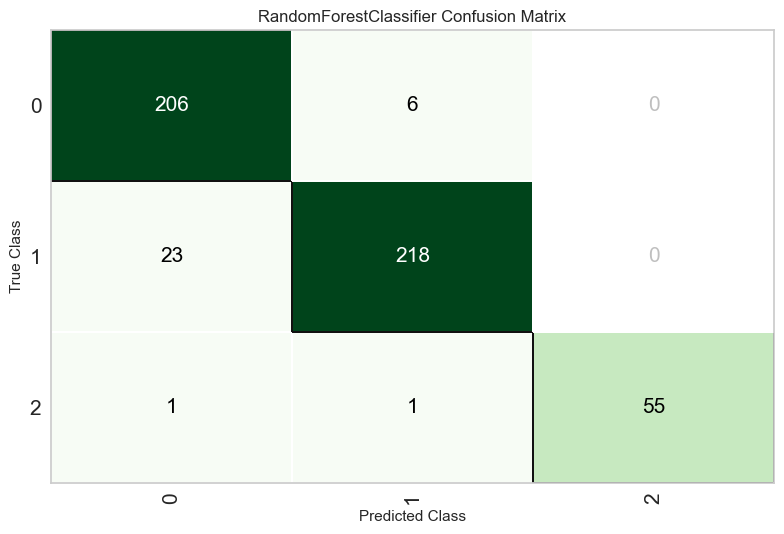

In [9]:
clf1 = setup(data=x_train, target=df_train['finding_birads'], session_id=123)

modelo = create_model('rf')

# Evaluar el modelo, se abrirá un menú interactivo
evaluate_model(modelo)

# Para mostrar específicamente la matriz de confusión
plot_model(modelo, plot='confusion_matrix')


In [8]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [ ]:
modelo = 'rf'

In [38]:
final_model = best_model
predictions = predict_model(final_model, data=x_test)
y_pred = predictions['prediction_label']
y_true = df_test['finding_birads']

accuracy = accuracy_score(y_true, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 1.0000
